# RECOMMENDATION SYSTEM

In [1]:
import pandas as pd
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
airbnb = pd.read_csv('./Desktop/listings-2.csv', usecols = ['neighbourhood_cleansed', 'name', 'description'])
airbnb.head(10)

,name,description,neighbourhood_cleansed
0,"La Casa Gaienmae C Harajuku, Omotesando is nearby",This shared flat is locating at very close to ...,Shibuya Ku
1,Oshiage Holiday Apartment,"We are happy to welcome you to our apartment, ...",Sumida Ku
2,Private apt in central Tokyo #203,::::::::::::::::::::::::::::::::::::::::::::::...,Nerima Ku
3,"Cozy flat #203, local area YET 10 mins to shib...","So close to busy centers, yet so peaceful! Jus...",Setagaya Ku
4,Private apt in central Tokyo #201,::::::::::::::::::::::::::::::::::::::::::::::...,Nerima Ku
5,RELAX AT HOME:Shimo 5'/Shibuya 10',"Monthly private fully furnished house, cozy an...",Setagaya Ku
6,"Classy room @Shinjuku, Takadanoba",..*+;.*:' Popular room in Airbnb@Tokyo *;+:..*...,Shinjuku Ku
7,4F - Near Shinjuku & Shibuya w/Free WiFi,License M (Phone number hidden by Airbnb) Enti...,Shibuya Ku
8,WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya,female travellers here only. Sorry no boys and...,Setagaya Ku
9,Home stay with a Japanese language teacher fam...,★*:.★*:. Must Read .:*★.:*★ *:.Maximum 3 adul...,Shinjuku Ku


In [4]:
airbnb['name'] = airbnb['name'].astype('str')
airbnb['description'] = airbnb['description'].astype('str')

In [5]:
name = ' '.join(airbnb['name'])
space = ' '.join(airbnb['description'])

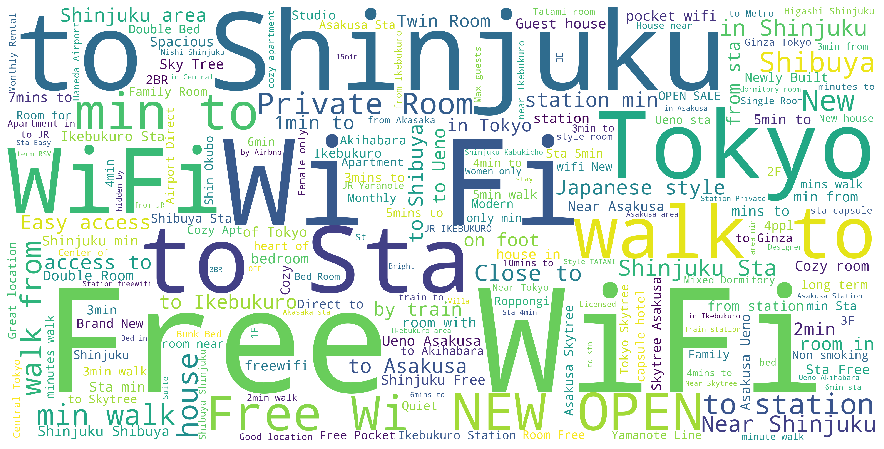

In [6]:
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

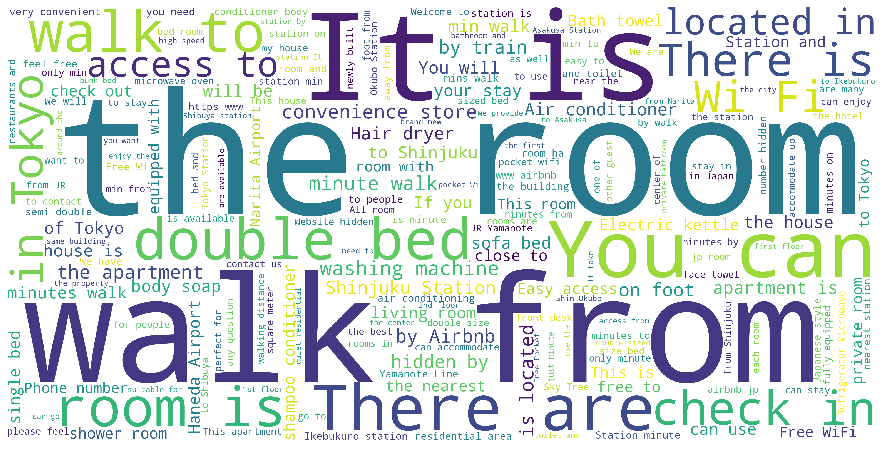

In [7]:
space_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(space)
plt.figure(figsize = (16,8))
plt.imshow(space_wordcloud)
plt.axis('off')
plt.show()

In [8]:
airbnb['content'] = airbnb[['name', 'description']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)

In [9]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(airbnb['content'])

In [10]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [11]:
results = {}
for idx, row in airbnb.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], airbnb['neighbourhood_cleansed'][i]) for i in similar_indices]
    results[row['neighbourhood_cleansed']] = similar_items[1:]

In [28]:
def item(neighbourhood_cleansed):
    name   = airbnb.loc[airbnb['neighbourhood_cleansed'] == neighbourhood_cleansed]['content'].tolist()[0].split(' // ')[0]
    desc   = ' \nDescription: ' + airbnb.loc[airbnb['neighbourhood_cleansed'] == neighbourhood_cleansed]['content'].tolist()[0].split(' // ')[1][0:165] + '...'
    prediction = name  + desc
    return prediction

def recommend(kota, num):
    print('Rekomendasi ' + str(num) + ' listing yang mirip dengan ' + item(kota))
    print('---')
    recs = results[kota][:num]
    for rec in recs:
        print('\nHasil : ' + item(rec[1]))

In [29]:
KOTA = input("Masukkan Area yang ingin anda lihat: ")
JUMLAH = int(input("Masukkan Jumlah Pencarian: "))
recommend(kota = KOTA ,num = JUMLAH)

Masukkan Area yang ingin anda lihat:  Shibuya Ku
Masukkan Jumlah Pencarian:  20


Rekomendasi 20 listing yang mirip dengan La Casa Gaienmae C Harajuku, Omotesando is nearby 
Description: This shared flat is locating at very close to Harajuku, Omotesando area. If you enjoy being Harajuku Girl or boy here is the perfect place to stay in. You have 2 fla...
---

Hasil : Pine House 2 Bed Room + 2 Toilets 
Description: Located in Tateishi, a quaint neighborhood built around a local station in Tokyo.  Good access to major sight-seeing spots (15mins ~ 50mins by local train) We offer ...

Hasil : Pine House 2 Bed Room + 2 Toilets 
Description: Located in Tateishi, a quaint neighborhood built around a local station in Tokyo.  Good access to major sight-seeing spots (15mins ~ 50mins by local train) We offer ...

Hasil : Pine House 2 Bed Room + 2 Toilets 
Description: Located in Tateishi, a quaint neighborhood built around a local station in Tokyo.  Good access to major sight-seeing spots (15mins ~ 50mins by local train) We offer ...

Hasil : Oshiage Holiday Apartment 
Descript